**About DataSet**

This data set originates from a practice-relevant degradation process, which is representative for Prognostics and Health Management (PHM) applications. The observed degradation process is the clogging of filters when separating of solid particles from gas. A test bench is used for this purpose, which performs automated life testing of filter media by loading them. For testing, dust complying with ISO standard 12103-1 and with a known particle size distribution is employed. The employed filter media is made of randomly oriented non-woven fibre material

**Columns**


Data_No: Identifies the operational run or trajectory for the machine.

Differential_pressure: Indicates the difference in pressure; high values may indicate clogging or wear.

Flow_rate: The fluid's flow rate; changes may signal reduced efficiency or blockage.

Time: The elapsed time in the trajectory; helps track how conditions evolve.

Dust_feed: The quantity of dust fed into the system; higher dust feed may accelerate wear.

Dust: The type of dust, impacting wear and tear

RUL: Remaining Useful Life, which is the target variable for prediction.


**Objective**:

To predict the Remaining Useful Life (RUL) of a machine based on its sensor readings and operational conditions.

**Problem**:

Early identification of machines with low RUL is essential to schedule timely maintenance, prevent unexpected failures, and reduce downtime.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:

df_train= pd.read_csv('/content/Train_Data_CSV.csv')
df_train.head(7)

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.9
1,1,0.361690,54.986671,0.2,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.8
2,1,0.000000,55.424786,0.3,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.7
3,1,2.622251,55.524146,0.4,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.6
4,1,3.888165,55.852018,0.5,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.5
5,1,4.521122,56.130203,0.6,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.4
6,1,4.521122,56.150070,0.7,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.3


In [ ]:
# df_train.set_index('Time', inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39414 entries, 0 to 39413
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data_No                39414 non-null  int64  
 1   Differential_pressure  39414 non-null  float64
 2   Flow_rate              39414 non-null  float64
 3   Time                   39414 non-null  float64
 4   Dust_feed              39414 non-null  float64
 5   Dust                   39414 non-null  object 
 6   RUL                    39414 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
df_train.isnull().sum()

,0
Data_No,0
Differential_pressure,0
Flow_rate,0
Time,0
Dust_feed,0
Dust,0
RUL,0


In [ ]:
df_train["Dust"].unique()

array(['ISO 12103-1, A3 Medium Test Dust',
       'ISO 12103-1, A2 Fine Test Dust',
       'ISO 12103-1, A4 Coarse Test Dust'], dtype=object)

In [ ]:
# df_train['Time'] = pd.to_datetime(df_train['Time'])

In [ ]:
# df_train['Time'] = pd.date_range(start='2023-01-01', periods=len(df_train), freq='D')

In [ ]:
# df_train.set_index('Time', inplace=True)

#*Encoding*

In [ ]:
label_enc = LabelEncoder()
df_train["Dust"] = label_enc.fit_transform(df_train["Dust"])



In [ ]:
df_train["Dust"].unique()

array([1, 0, 2])

#Scaling

In [ ]:
# standard_scaler = StandardScaler()
# df_train[['Differential_pressure', 'Flow_rate', 'Dust_feed']] = standard_scaler.fit_transform(df_train[['Differential_pressure', 'Flow_rate', 'Dust_feed']])

# time_column = df_train['Time']
# df_train_toscale = df_train.drop(columns=['Time'])
# df_train.set_index('Time', inplace=True)
# standard_scaler = StandardScaler()
# df_train = standard_scaler.fit_transform(df_train_toscale)
# df_train = pd.DataFrame(df_train, columns=['Data_No', 'Differential_pressure', 'Flow_rate', 'Dust_feed', 'Dust', 'RUL'])
# df_train["Time"] = time_column
# df_train['Time'] = pd.date_range(start='2023-01-01', periods=len(df_train), freq='D')


In [ ]:
# df_train.set_index('Time', inplace=True)

In [ ]:
df_train.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,1,58.9
1,1,0.361690,54.986671,0.2,236.428943,1,58.8
2,1,0.000000,55.424786,0.3,236.428943,1,58.7
3,1,2.622251,55.524146,0.4,236.428943,1,58.6
4,1,3.888165,55.852018,0.5,236.428943,1,58.5


In [ ]:
df_train.tail()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
39409,50,465.4948,82.675521,52.0,316.985065,2,8.2
39410,50,464.2289,82.421873,52.1,316.985065,2,8.1
39411,50,466.0373,82.743156,52.2,316.985065,2,8.0
39412,50,472.2765,82.785427,52.3,316.985065,2,7.9
39413,50,474.1754,83.013710,52.4,316.985065,2,7.8


#EDA

In [ ]:
numerical_values = ["Differential_pressure", "Flow_rate","Time","Dust_feed"]
numerical_values

['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed']

#Ploting Relationship between features and RUL





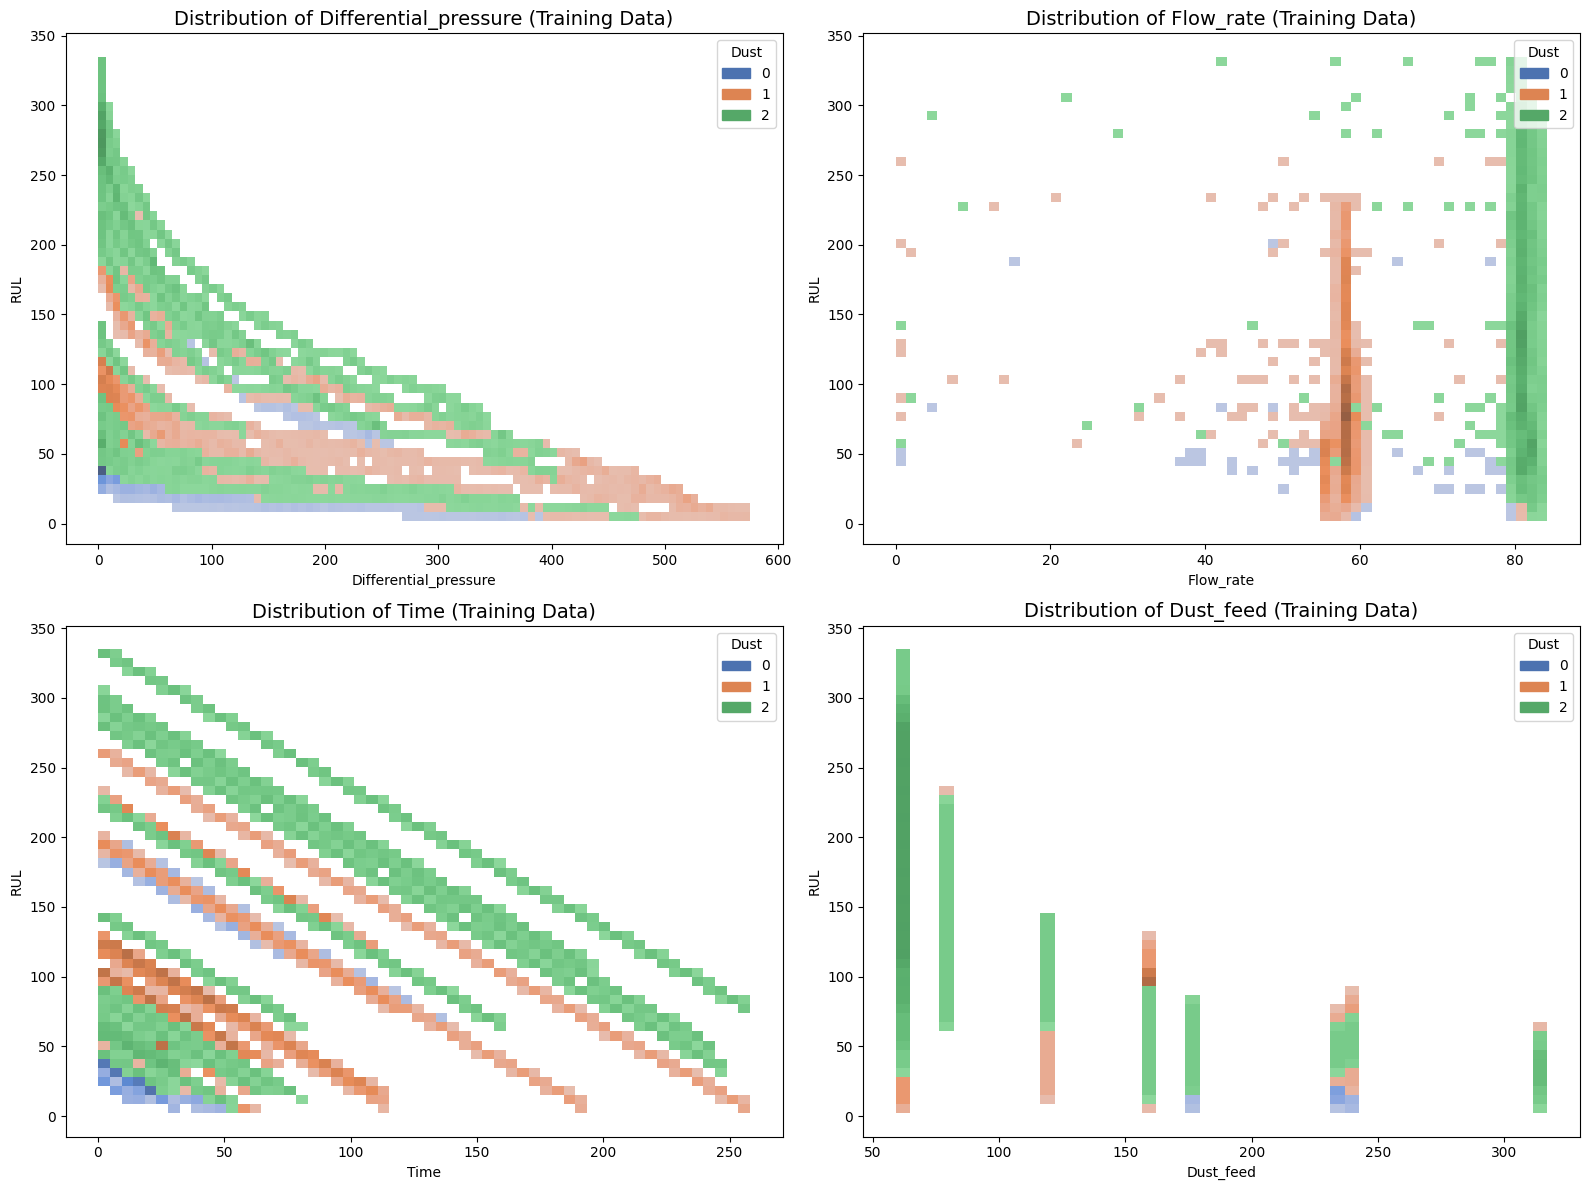

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
# sns.set_theme(style="whitegrid")


for i, col in enumerate(numerical_values):
  sns.histplot(data = df_train, x = col , y = "RUL" , kde=True, ax=axes[i], hue="Dust", palette="deep",color = "skyblue")
  axes[i].set_title(f'Distribution of {col} (Training Data)', fontsize=14)

plt.tight_layout()
plt.show()

#plotting graph between Numerical features


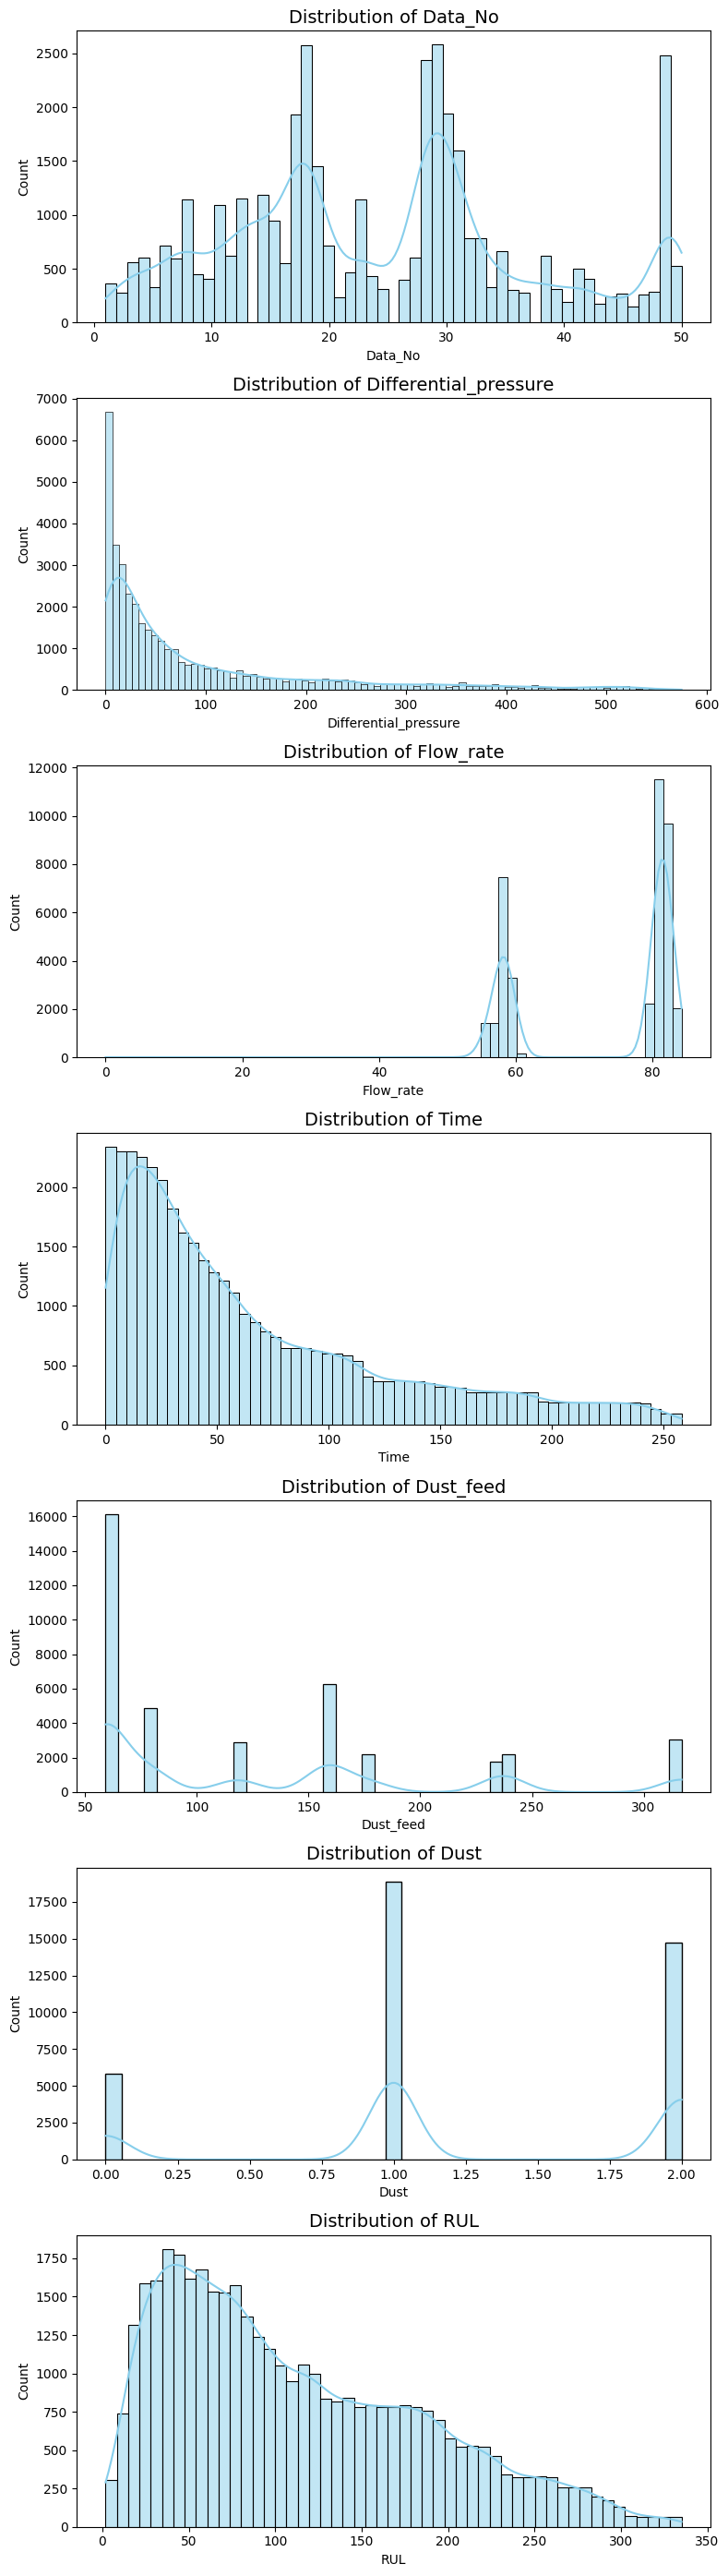

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# axes = axes.flatten()
# sns.set_theme(style="whitegrid")

# for i, col in enumerate(numerical_values):
#   sns.histplot(data = df_train[col], kde = True, ax=axes[i], color = "skyblue", palette = "deep")
#   axes[i].set_title(f'Distribution of {col} (Test Data)', fontsize=14)

# plt.tight_layout()
# plt.show()


numerical_columns = [col for col in df_train.columns]


fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
grouped =df_train.groupby("Data_No")

In [ ]:
grouped.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,1,58.9
1,1,0.361690,54.986671,0.2,236.428943,1,58.8
2,1,0.000000,55.424786,0.3,236.428943,1,58.7
3,1,2.622251,55.524146,0.4,236.428943,1,58.6
4,1,3.888165,55.852018,0.5,236.428943,1,58.5
...,...,...,...,...,...,...,...
38890,50,0.000000,0.000000,0.1,316.985065,2,60.1
38891,50,0.000000,50.344246,0.2,316.985065,2,60.0
38892,50,0.000000,72.774531,0.3,316.985065,2,59.9
38893,50,0.000000,78.370137,0.4,316.985065,2,59.8


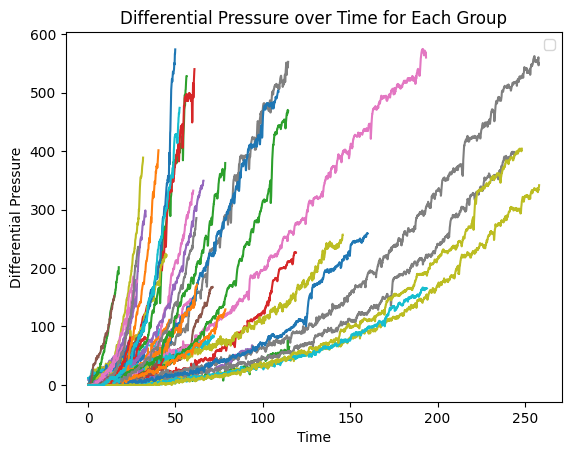

In [ ]:
for name , group in grouped:
  plt.plot(group["Time"], group["Differential_pressure"])

plt.xlabel("Time")
plt.ylabel("Differential Pressure")
plt.title("Differential Pressure over Time for Each Group")
plt.legend()
plt.show()



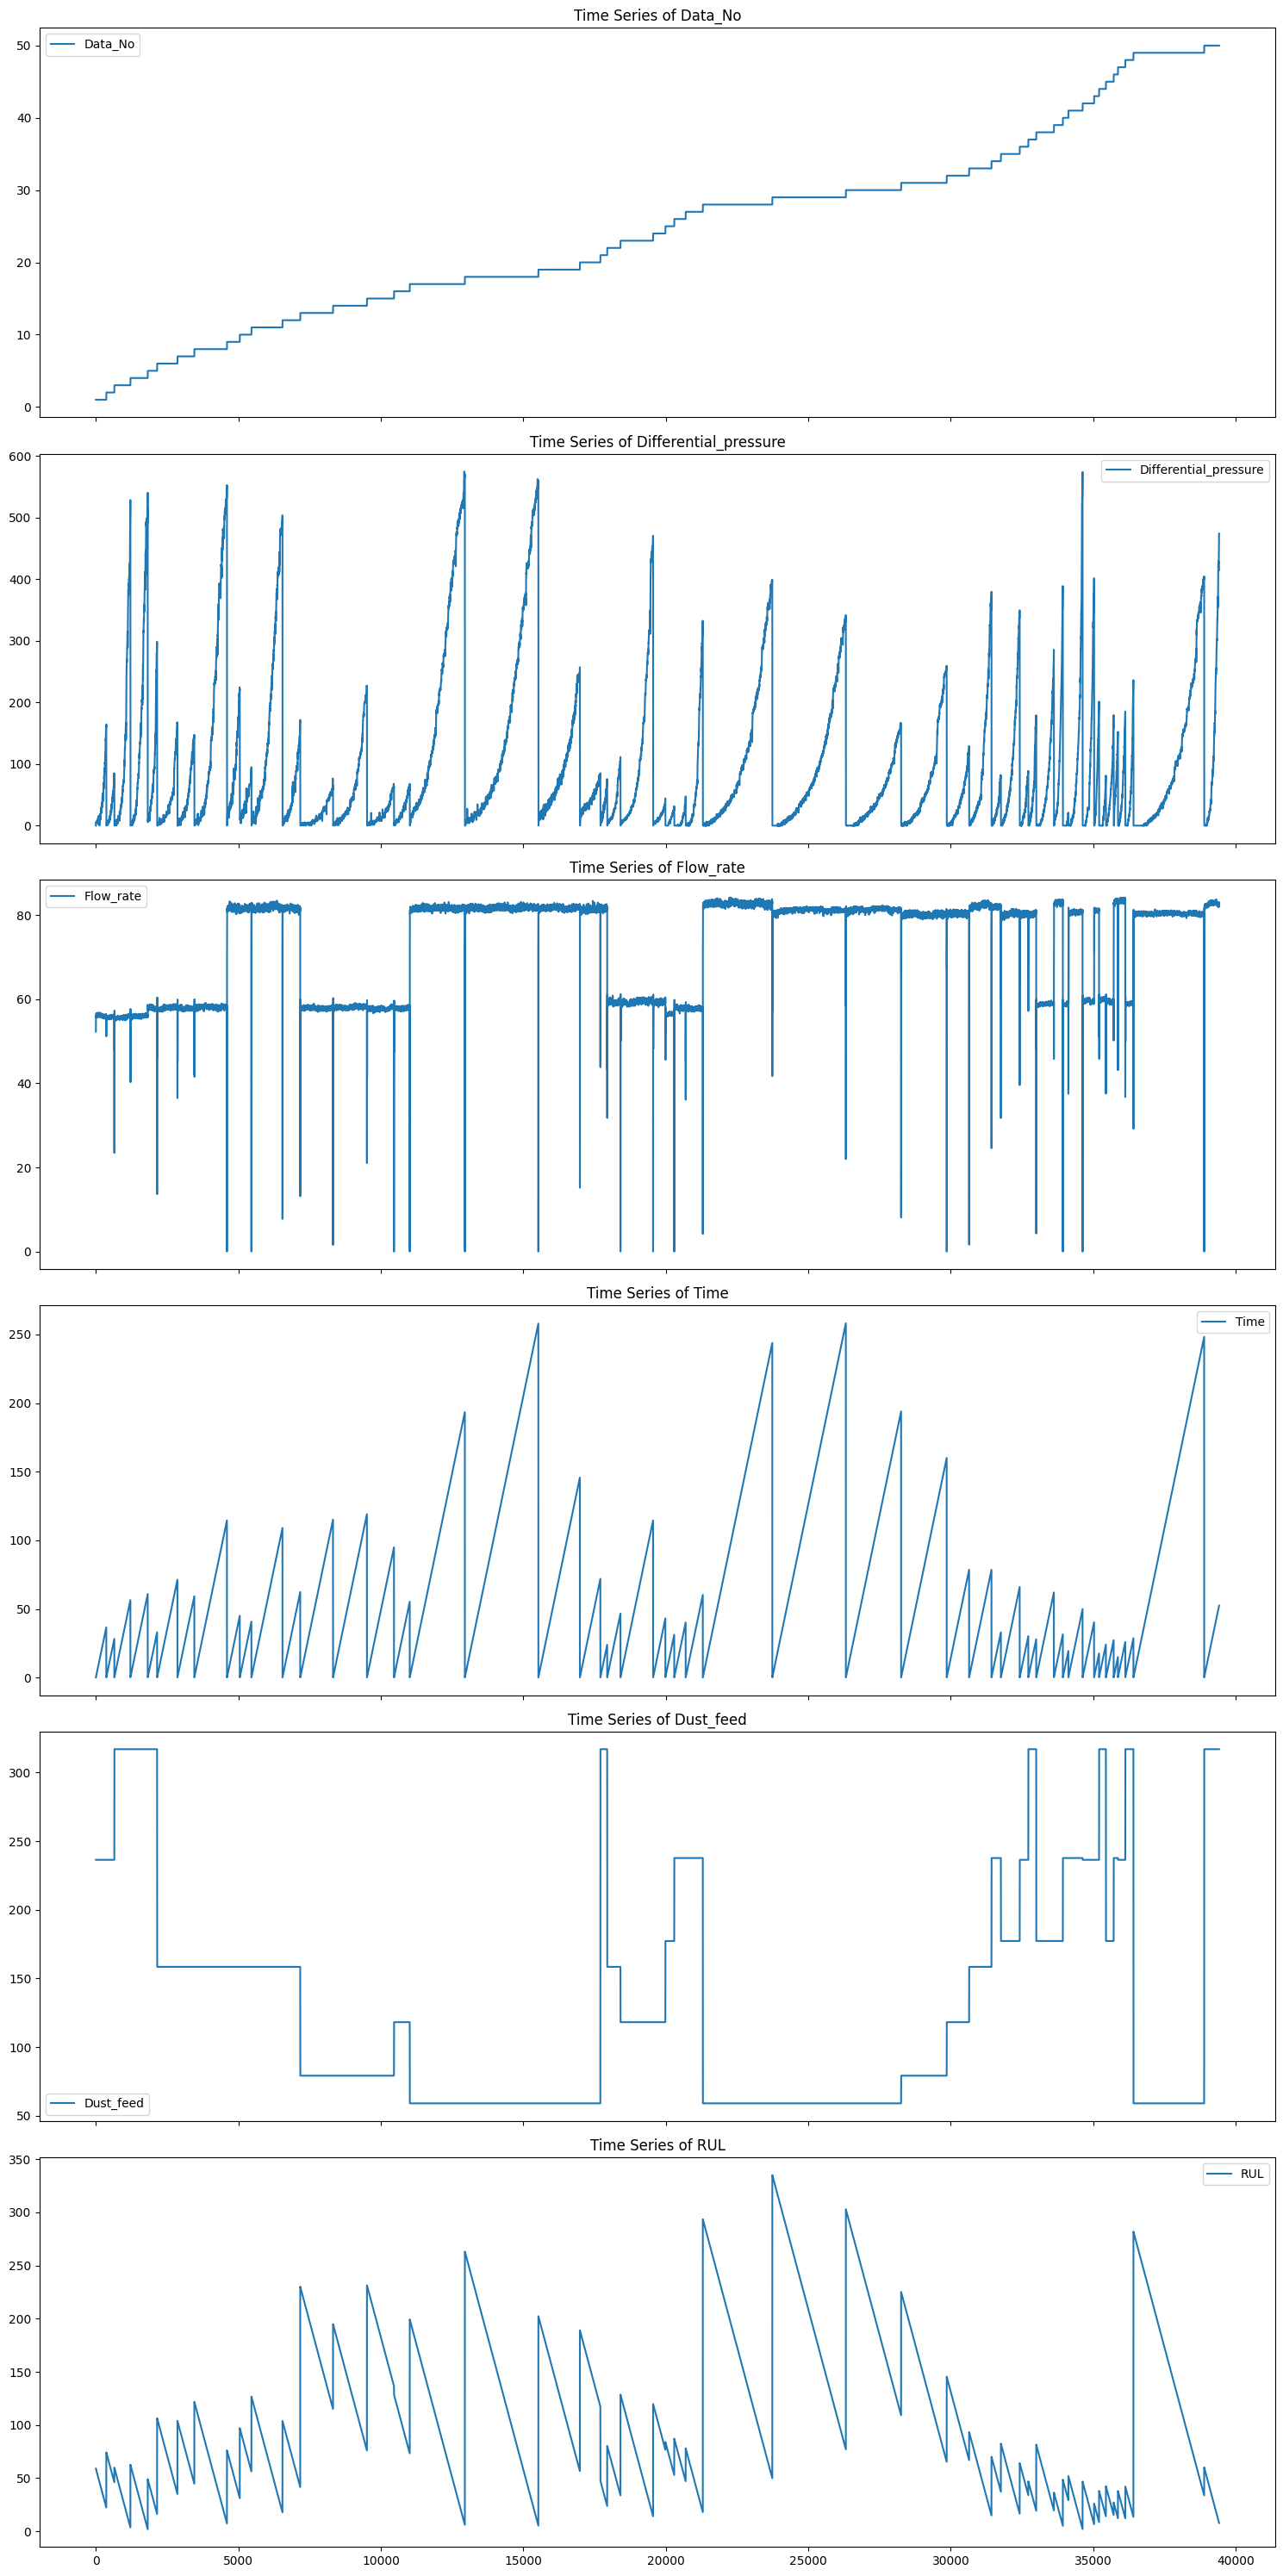

In [ ]:
features = [column for column in df_train.columns if column != 'Dust']
num_features = len(features)


fig, axes = plt.subplots(num_features, 1, figsize=(15, 5 * num_features), sharex=True)

for ax, column in zip(axes, features):
    ax.plot(df_train.index, df_train[column], label=column)
    ax.set_title(f'Time Series of {column}')
    ax.legend()

plt.tight_layout()
plt.show()


<Axes: >

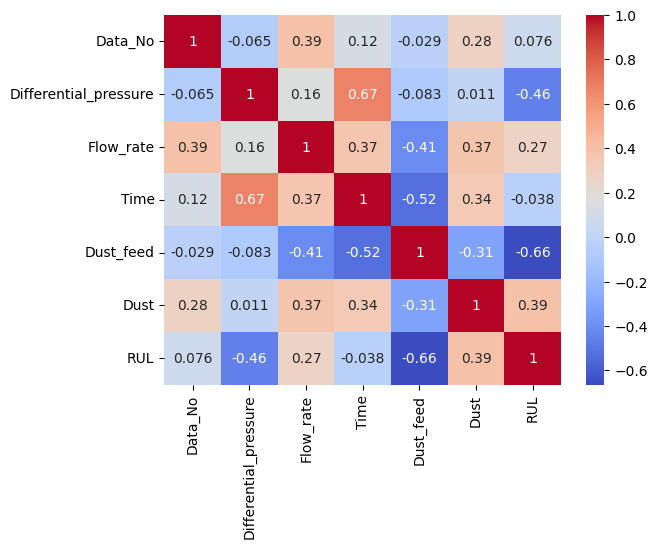

In [ ]:
sns.heatmap(df_train.corr(),annot=True, cmap='coolwarm')

In [ ]:
# df_train['Time'] = pd.date_range(start='2023-01-01', periods=len(df_train), freq='D')
# df_train.set_index('Time', inplace=True)

In [ ]:
df_train.head(2)


,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,1,0.271267,52.281993,0.1,236.428943,1,58.9
1,1,0.361690,54.986671,0.2,236.428943,1,58.8


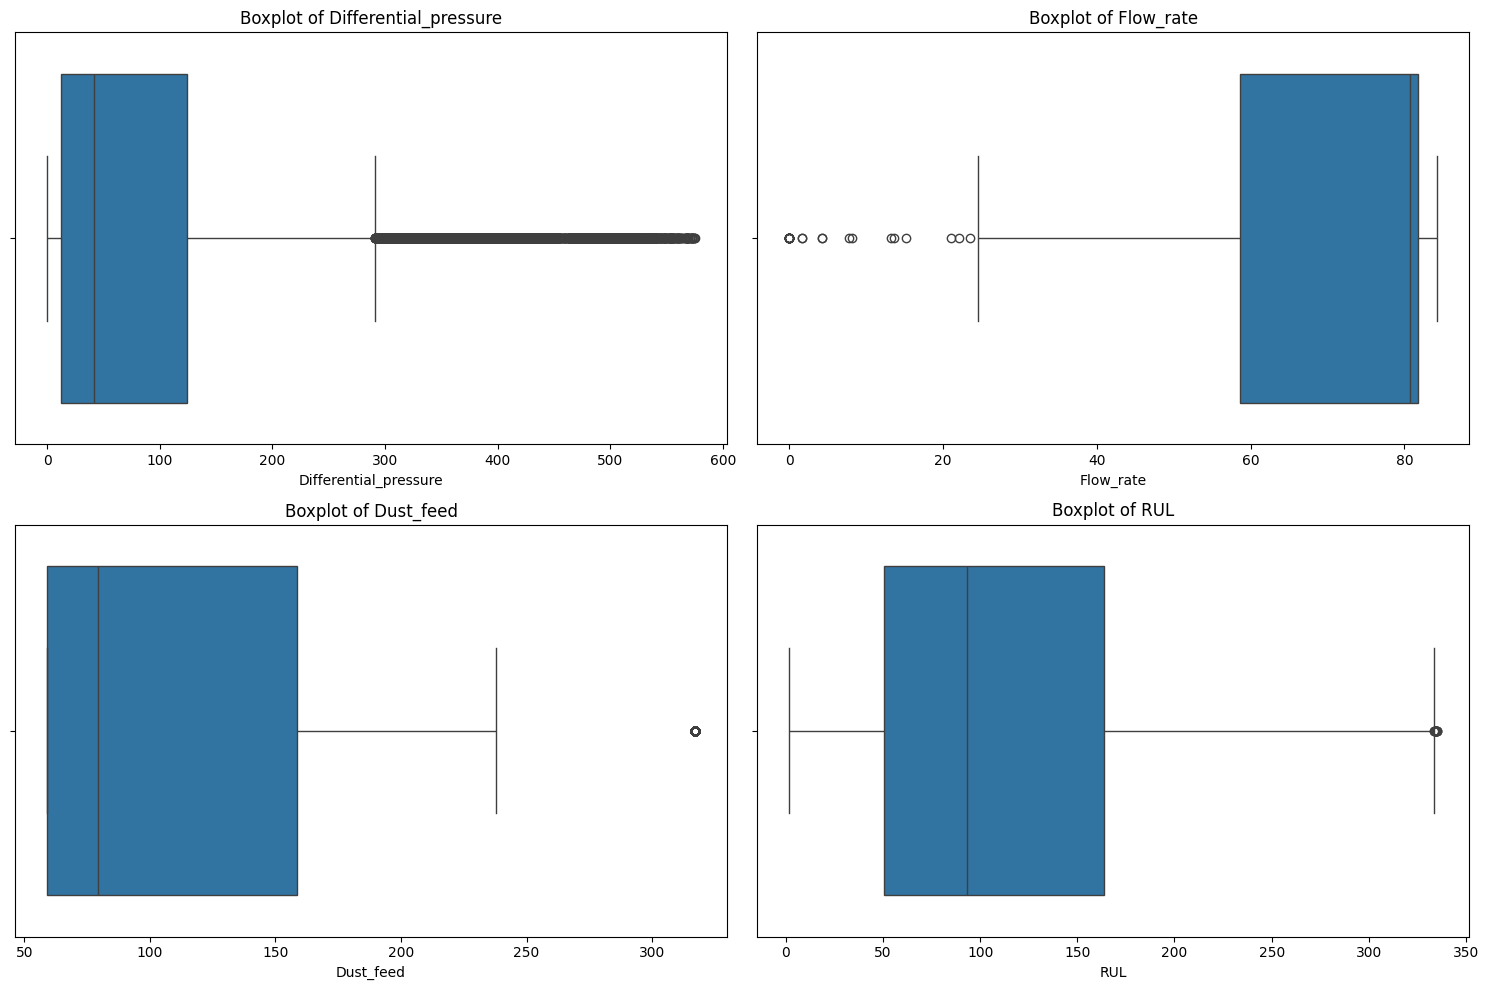

In [ ]:
#Checking for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(["Differential_pressure", "Flow_rate", "Dust_feed", "RUL"], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df_train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# df_train.set_index('Time', inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

def handle_outliers(df, method="winsorize", z_thresh=3, cap_percentile=0.01):

    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        # Calculate Z-scores for the column
        z_scores = zscore(df[col].dropna())
        outliers = abs(z_scores) > z_thresh

        if method == "winsorize":
            # Winsorize the column
            lower_limit = cap_percentile
            upper_limit = cap_percentile
            df[col] = winsorize(df[col], limits=[lower_limit, upper_limit])

        elif method == "cap":
            # Cap the column using percentiles
            lower_limit = df[col].quantile(cap_percentile)
            upper_limit = df[col].quantile(1 - cap_percentile)
            df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

        elif method == "impute":
            # Replace outliers with the median of non-outlier values
            median_value = df.loc[~outliers, col].median()
            df.loc[outliers, col] = median_value
    return df




In [ ]:

df_train = handle_outliers(df_train, method="winsorize", z_thresh=3, cap_percentile=0.01)


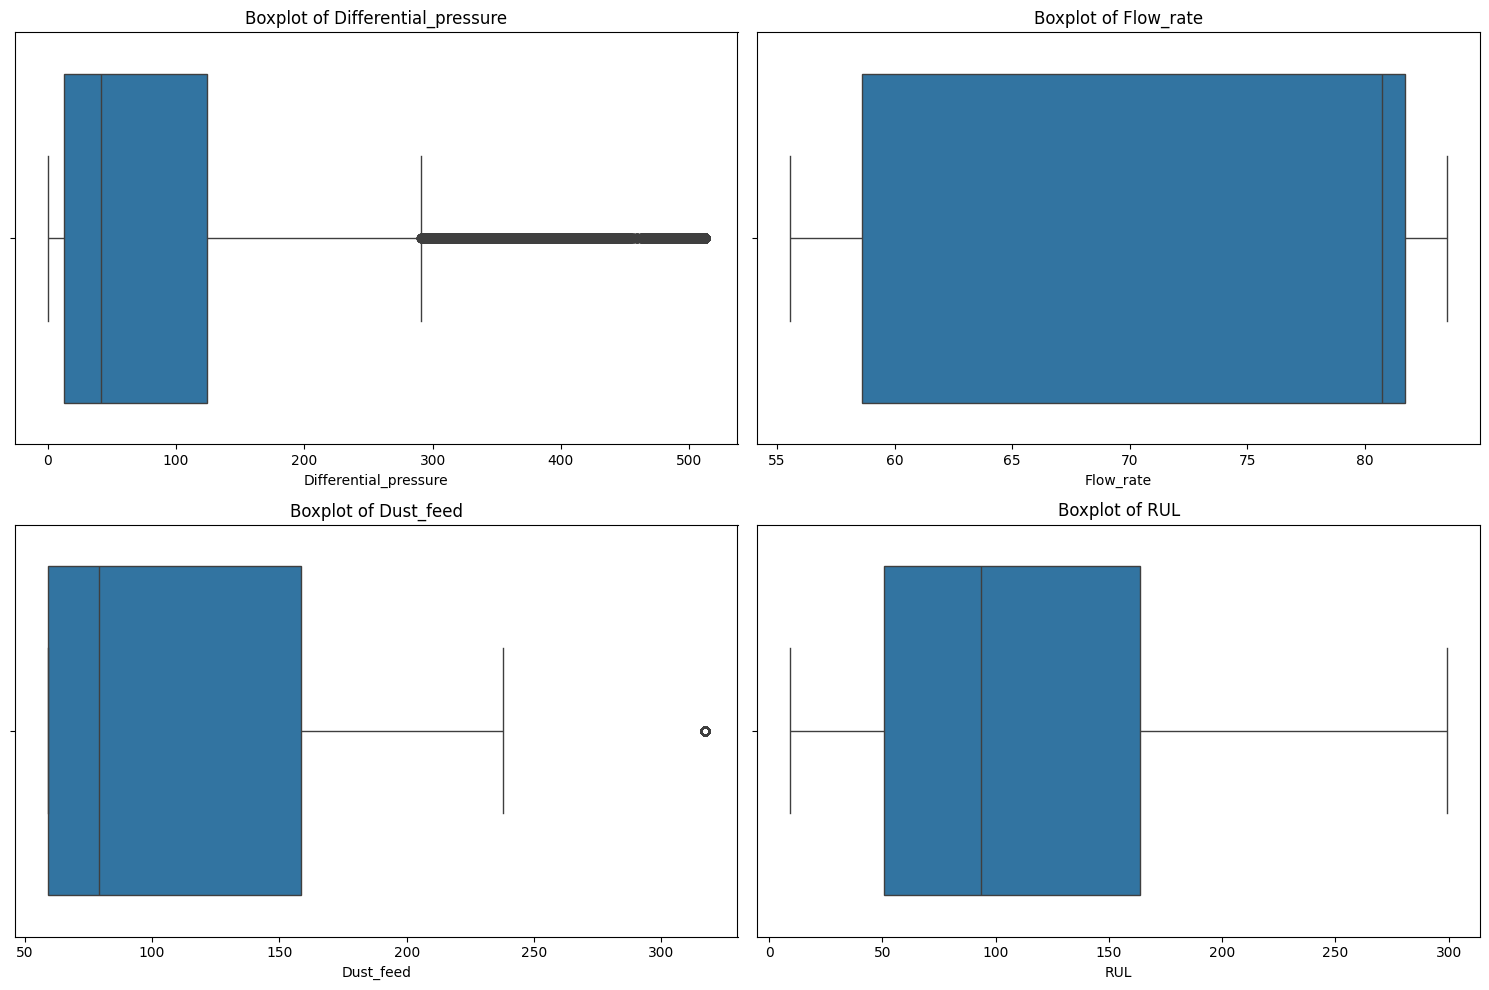

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(["Differential_pressure", "Flow_rate", "Dust_feed", "RUL"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
cap_value = 290
df_train["Differential_pressure"] = df_train["Differential_pressure"].apply(
    lambda x: cap_value if x > cap_value else x
)


<Axes: ylabel='Differential_pressure'>

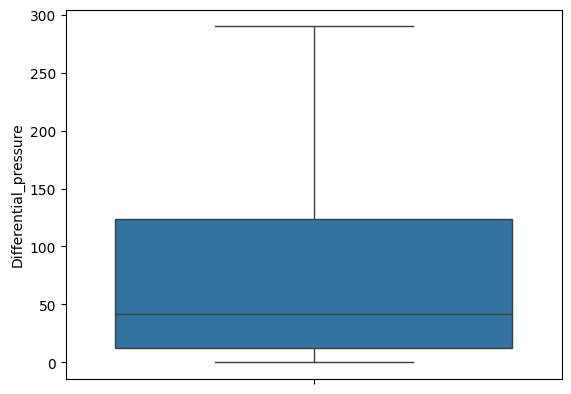

In [ ]:
sns.boxplot(df_train["Differential_pressure"])

In [ ]:
cap_value = 250
df_train["Dust_feed"] = df_train["Dust_feed"].apply(
    lambda x: cap_value if x > cap_value else x
)

<Axes: ylabel='Dust_feed'>

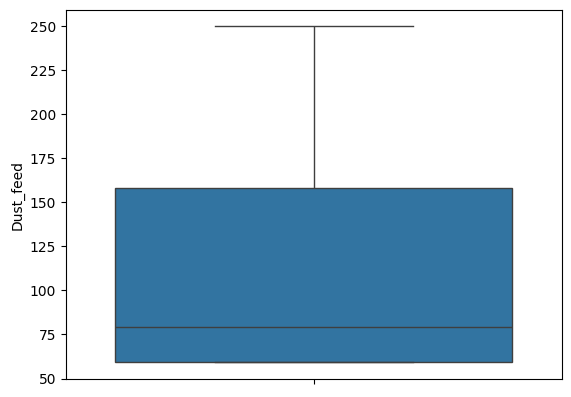

In [ ]:
sns.boxplot(df_train["Dust_feed"])

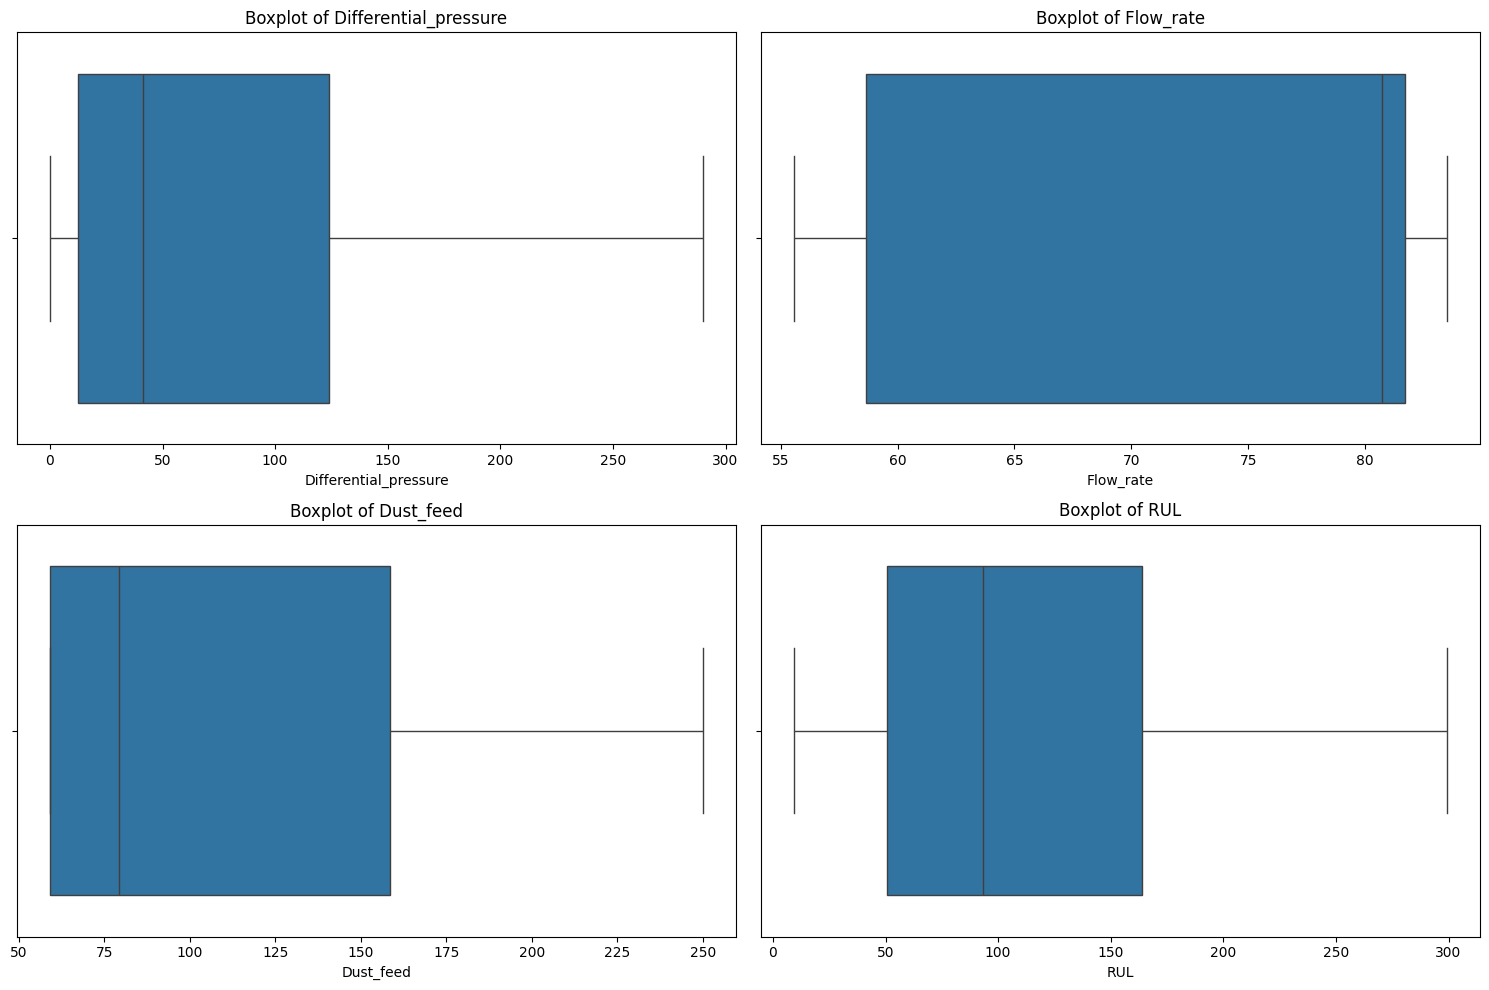

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(["Differential_pressure", "Flow_rate", "Dust_feed", "RUL"], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# time_column = df_train['Time']
# # df_train_toscale = df_train.drop(columns=['Time'])
# standard_scaler = StandardScaler()
# df_train_scaled = standard_scaler.fit_transform(df_train)
# df_train_scaled = pd.DataFrame(df_train_scaled, columns=['Data_No', 'Differential_pressure', 'Flow_rate', 'Dust_feed',"Time", 'Dust', 'RUL'])
# df_train["Time"] = time_column

In [ ]:
# df_train.set_index('Time', inplace=True)

In [ ]:
# df_train_scaled.head()

In [ ]:
df_train.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,2,0.271267,55.563892,0.9,236.428943,1,58.9
1,2,0.361690,55.563892,0.9,236.428943,1,58.8
2,2,0.000000,55.563892,0.9,236.428943,1,58.7
3,2,2.622251,55.563892,0.9,236.428943,1,58.6
4,2,3.888165,55.852018,0.9,236.428943,1,58.5


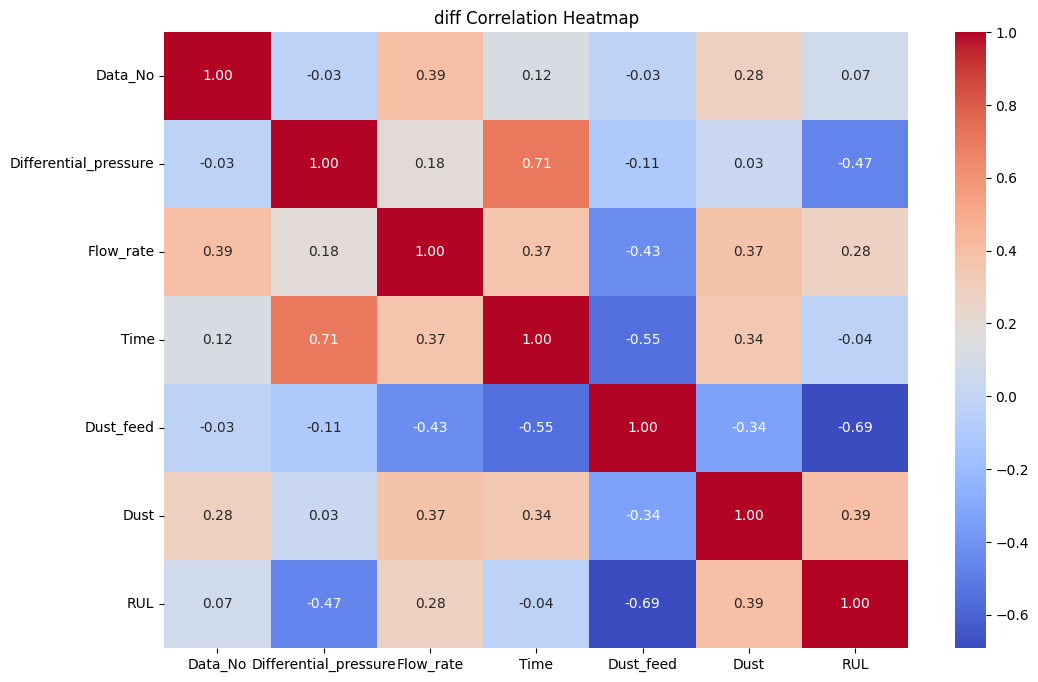

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("diff Correlation Heatmap")
plt.show()

In [ ]:
df_train.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,2,0.271267,55.563892,0.9,236.428943,1,58.9
1,2,0.361690,55.563892,0.9,236.428943,1,58.8
2,2,0.000000,55.563892,0.9,236.428943,1,58.7
3,2,2.622251,55.563892,0.9,236.428943,1,58.6
4,2,3.888165,55.852018,0.9,236.428943,1,58.5


In [ ]:
# Function to perform and interpret ADF test
def adf_test(series, column_name):
    result = adfuller(series)
    return {
        "Column": column_name,
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Stationary": result[1] < 0.05
    }

In [ ]:
# Perform ADF test on numerical columns
adf_results = [
    adf_test(df_train[col], col)
    for col in df_train.columns
]

In [ ]:
adf_results

[{'Column': 'Data_No',
  'ADF Statistic': 0.5703667091610085,
  'p-value': 0.9868619822199169,
  'Stationary': False},
 {'Column': 'Differential_pressure',
  'ADF Statistic': -7.969537604129574,
  'p-value': 2.8053835323570505e-12,
  'Stationary': True},
 {'Column': 'Flow_rate',
  'ADF Statistic': -4.1849594217272825,
  'p-value': 0.0006986102061432259,
  'Stationary': True},
 {'Column': 'Time',
  'ADF Statistic': -5.800550820099571,
  'p-value': 4.641942196310569e-07,
  'Stationary': True},
 {'Column': 'Dust_feed',
  'ADF Statistic': -3.272326382141326,
  'p-value': 0.016161722265096833,
  'Stationary': True},
 {'Column': 'Dust',
  'ADF Statistic': -2.297786590272127,
  'p-value': 0.1726828339942575,
  'Stationary': False},
 {'Column': 'RUL',
  'ADF Statistic': -5.097120680584712,
  'p-value': 1.420709531501798e-05,
  'Stationary': True}]

#KPSS Test

In [ ]:
def kpss_test(series, column_name):
    statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
    return {
        "Column": column_name,
        "KPSS Statistic": statistic,
        "p-value": p_value,
        "Stationary": p_value > 0.05,
        "Critical_Value": Critical_Value
    }

In [ ]:
kpss_results = [
    kpss_test(df_train[col], col)
    for col in ["RUL", "Differential_pressure", "Flow_rate", "Dust_feed"]
]

<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up ta

In [ ]:
kpss_results

[{'Column': 'RUL',
  'KPSS Statistic': 1.7661157781245875,
  'p-value': 0.01,
  'Stationary': False,
  'Critical_Value': 117},
 {'Column': 'Differential_pressure',
  'KPSS Statistic': 0.17863938568060175,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 117},
 {'Column': 'Flow_rate',
  'KPSS Statistic': 6.981031227431006,
  'p-value': 0.01,
  'Stationary': False,
  'Critical_Value': 117},
 {'Column': 'Dust_feed',
  'KPSS Statistic': 2.8230384884334008,
  'p-value': 0.01,
  'Stationary': False,
  'Critical_Value': 117}]

In [ ]:
# df_pressure= df_train["Differential_pressure"]

In [ ]:
# df_pressure = df_train["Differential_pressure"]
# df_pressure

In [ ]:
# df_train.drop(columns=["Differential_pressure"], inplace=True)

In [ ]:
df_train["RUL"] = np.sqrt(df_train["RUL"])

In [ ]:
df_train.head(4)

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,2,0.271267,55.563892,0.9,236.428943,1,7.674634
1,2,0.361690,55.563892,0.9,236.428943,1,7.668116
2,2,0.000000,55.563892,0.9,236.428943,1,7.661593
3,2,2.622251,55.563892,0.9,236.428943,1,7.655064


In [ ]:
df = df_train.diff()

In [ ]:
df.fillna(method='bfill', inplace=True)

<ipython-input-54-168d8f9d469d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# df["Differential_pressure"] = df_pressure

In [ ]:
df.sample()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
2569,0.0,-1.89887,0.175591,0.1,0.0,0.0,-0.006233


In [ ]:
kpss_results = [
    kpss_test(df[col], col)
    for col in df.columns
]

<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
<ipython-input-45-c9f099b20b5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up ta

In [ ]:
kpss_results

[{'Column': 'Data_No',
  'KPSS Statistic': 0.20229298432315482,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 10},
 {'Column': 'Differential_pressure',
  'KPSS Statistic': 0.00868258172528831,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 9},
 {'Column': 'Flow_rate',
  'KPSS Statistic': 0.015358469950478524,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 136},
 {'Column': 'Time',
  'KPSS Statistic': 0.01076449071219275,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 1},
 {'Column': 'Dust_feed',
  'KPSS Statistic': 0.09262971083210483,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 0},
 {'Column': 'Dust',
  'KPSS Statistic': 0.04573315176125111,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 0},
 {'Column': 'RUL',
  'KPSS Statistic': 0.023019327873146582,
  'p-value': 0.1,
  'Stationary': True,
  'Critical_Value': 6}]

In [ ]:
df.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,0.0,0.090423,0.000000,0.0,0.0,0.0,-0.006518
1,0.0,0.090423,0.000000,0.0,0.0,0.0,-0.006518
2,0.0,-0.361690,0.000000,0.0,0.0,0.0,-0.006523
3,0.0,2.622251,0.000000,0.0,0.0,0.0,-0.006529
4,0.0,1.265914,0.288125,0.0,0.0,0.0,-0.006534


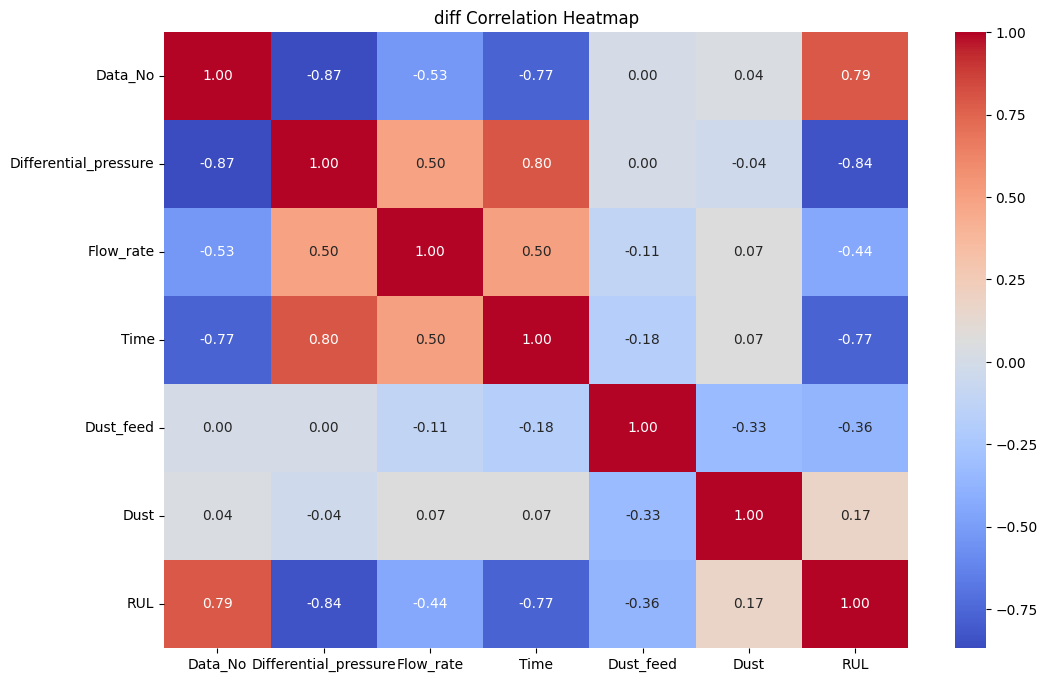

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("diff Correlation Heatmap")
plt.show()

#feature engineering

In [ ]:
#Rolling Statistics

In [ ]:
window_size = 5
df['Pressure_mean'] = df['Differential_pressure'].rolling(window=window_size, min_periods=1).mean()
df['Pressure_std'] = df['Differential_pressure'].rolling(window=window_size, min_periods=1).std()

df['Flow_mean'] = df['Flow_rate'].rolling(window=window_size, min_periods=1).mean()
df['Flow_std'] = df['Flow_rate'].rolling(window=window_size, min_periods=1).std()

df['Differential_pressure_lag1'] = df.groupby('Data_No')['Differential_pressure'].shift(1)
df['Flow_rate_lag1'] = df.groupby('Data_No')['Flow_rate'].shift(1)



In [ ]:
df.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL,Pressure_mean,Pressure_std,Flow_mean,Flow_std,Differential_pressure_lag1,Flow_rate_lag1
0,0.0,0.090423,0.000000,0.0,0.0,0.0,-0.006518,0.090423,NaN,0.000000,NaN,NaN,NaN
1,0.0,0.090423,0.000000,0.0,0.0,0.0,-0.006518,0.090423,0.000000,0.000000,0.000000,0.090423,0.0
2,0.0,-0.361690,0.000000,0.0,0.0,0.0,-0.006523,-0.060281,0.261028,0.000000,0.000000,0.090423,0.0
3,0.0,2.622251,0.000000,0.0,0.0,0.0,-0.006529,0.610352,1.358094,0.000000,0.000000,-0.361690,0.0
4,0.0,1.265914,0.288125,0.0,0.0,0.0,-0.006534,0.741464,1.212133,0.057625,0.128854,2.622251,0.0


In [ ]:
df.fillna(method = "bfill", inplace= True)

<ipython-input-64-3b7e09858845>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = "bfill", inplace= True)


In [ ]:
df.head(4)

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL,Pressure_mean,Pressure_std,Flow_mean,Flow_std,Differential_pressure_lag1,Flow_rate_lag1
0,0.0,0.090423,0.0,0.0,0.0,0.0,-0.006518,0.090423,0.000000,0.0,0.0,0.090423,0.0
1,0.0,0.090423,0.0,0.0,0.0,0.0,-0.006518,0.090423,0.000000,0.0,0.0,0.090423,0.0
2,0.0,-0.361690,0.0,0.0,0.0,0.0,-0.006523,-0.060281,0.261028,0.0,0.0,0.090423,0.0
3,0.0,2.622251,0.0,0.0,0.0,0.0,-0.006529,0.610352,1.358094,0.0,0.0,-0.361690,0.0


In [ ]:
# df['day'] = df.index.day


In [ ]:
df.head(4)

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL,Pressure_mean,Pressure_std,Flow_mean,Flow_std,Differential_pressure_lag1,Flow_rate_lag1
0,0.0,0.090423,0.0,0.0,0.0,0.0,-0.006518,0.090423,0.000000,0.0,0.0,0.090423,0.0
1,0.0,0.090423,0.0,0.0,0.0,0.0,-0.006518,0.090423,0.000000,0.0,0.0,0.090423,0.0
2,0.0,-0.361690,0.0,0.0,0.0,0.0,-0.006523,-0.060281,0.261028,0.0,0.0,0.090423,0.0
3,0.0,2.622251,0.0,0.0,0.0,0.0,-0.006529,0.610352,1.358094,0.0,0.0,-0.361690,0.0


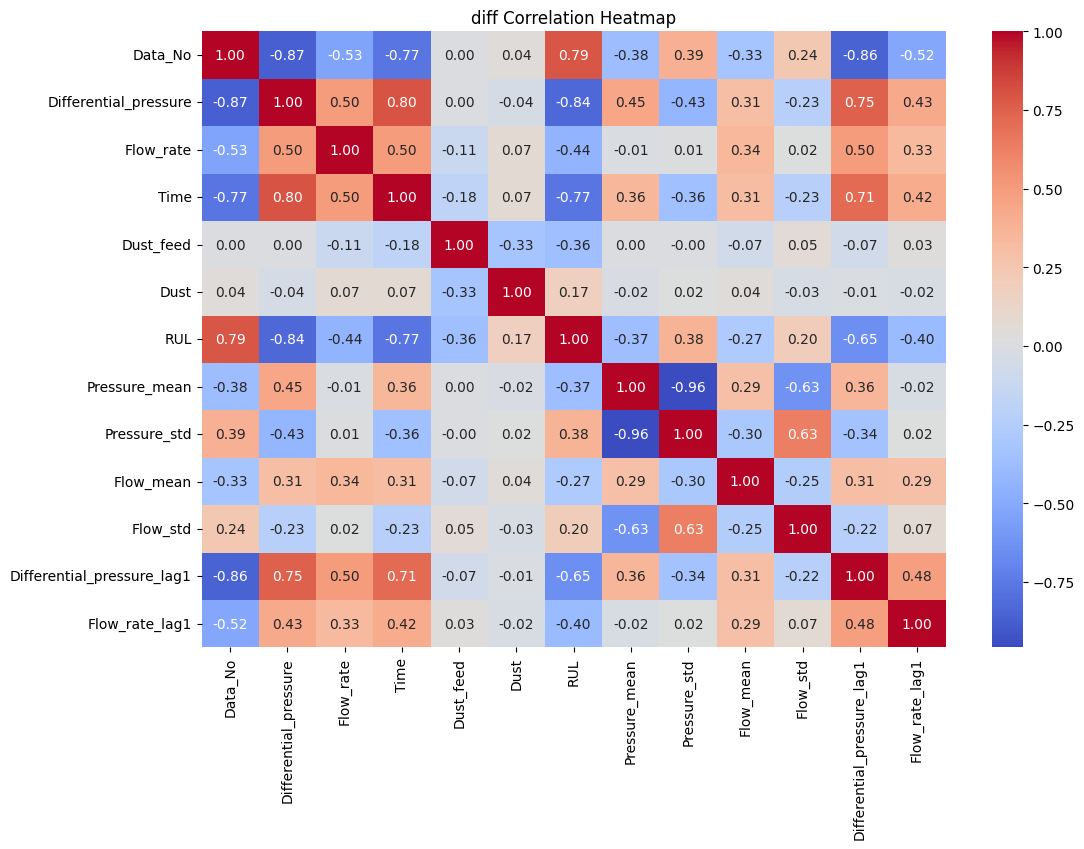

In [ ]:
plt.figure(figsize=(12, 8))
corr=df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("diff Correlation Heatmap")
plt.show()

In [ ]:
# #TESTING
# def kpss_test(series, column_name):
#     statistic, p_value, Critical_Value, _ = kpss(series, regression='c', nlags="auto")
#     return {
#         "Column": column_name,
#         "KPSS Statistic": statistic,
#         "p-value": p_value,
#         "Stationary": p_value > 0.05,
#         "Critical_Value": Critical_Value
#     }

In [ ]:
# kpss_results = [
#     kpss_test(df_train[col], col)
#     for col in df_train.columns
# ]

In [ ]:
# kpss_results

In [ ]:
# df = df_train.diff()

In [ ]:
# df.fillna(method='bfill', inplace=True)

In [ ]:
# df.head()

In [ ]:
# df_train.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# # Preparing data for feature importance analysis
X = df.drop(columns=['RUL'])
y = df['RUL']
# X = df.drop(columns=['RUL'])
# y = df['RUL']
X

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,Pressure_mean,Pressure_std,Flow_mean,Flow_std,Differential_pressure_lag1,Flow_rate_lag1
0,0.0,0.090423,0.000000,0.0,0.0,0.0,0.090423,0.000000,0.000000,0.000000,0.090423,0.000000
1,0.0,0.090423,0.000000,0.0,0.0,0.0,0.090423,0.000000,0.000000,0.000000,0.090423,0.000000
2,0.0,-0.361690,0.000000,0.0,0.0,0.0,-0.060281,0.261028,0.000000,0.000000,0.090423,0.000000
3,0.0,2.622251,0.000000,0.0,0.0,0.0,0.610352,1.358094,0.000000,0.000000,-0.361690,0.000000
4,0.0,1.265914,0.288125,0.0,0.0,0.0,0.741464,1.212133,0.057625,0.128854,2.622251,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
39409,0.0,0.000000,-0.101459,0.1,0.0,0.0,0.000000,0.000000,0.116676,0.302276,0.000000,0.109918
39410,0.0,0.000000,-0.253648,0.1,0.0,0.0,0.000000,0.000000,-0.025365,0.267501,0.000000,-0.101459
39411,0.0,0.000000,0.321284,0.1,0.0,0.0,0.000000,0.000000,-0.035511,0.248982,0.000000,-0.253648
39412,0.0,0.000000,0.042271,0.1,0.0,0.0,0.000000,0.000000,0.023673,0.217325,0.000000,0.321284


In [ ]:
# Using train test split to split the data in 80, 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using Random Forest for feature importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_model.score(X_test, y_test)

0.6635303272088517

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.67567423 0.81811025 0.85028455 0.8074953  0.78357146]
Mean CV R² Score: 0.7870271587067309


In [ ]:
y_pred_diff = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
r2 = r2_score(y_test, y_pred_diff)
mse = mean_squared_error(y_test, y_pred_diff)
mae = mean_absolute_error(y_test, y_pred_diff)

In [ ]:
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

R^2 Score: 0.6635
Mean Squared Error: 0.0096
Mean Absolute Error: 0.0041


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance.reset_index(drop=True), rf_model.score(X_test, y_test)

(                       Feature  Importance
 0        Differential_pressure    0.643586
 1                         Time    0.142236
 2                    Dust_feed    0.072992
 3                         Dust    0.031247
 4                    Flow_mean    0.027858
 5               Flow_rate_lag1    0.022132
 6   Differential_pressure_lag1    0.017242
 7                    Flow_rate    0.012780
 8                     Flow_std    0.012458
 9                Pressure_mean    0.007904
 10                     Data_No    0.005391
 11                Pressure_std    0.004175,
 0.6635303272088517)

In [ ]:
selected_features = ['Differential_pressure', 'Dust_feed', 'Flow_rate_lag1',"Differential_pressure_lag1","Dust","Flow_mean","Time"]
refined_data = df[selected_features + ['RUL']]

# refined_data['RUL_rolling_mean'] = refined_data['RUL'].rolling(window=5).mean()
# refined_data['RUL_rolling_std'] = refined_data['RUL'].rolling(window=5).std()

# selected_features = ['Differential_pressure_x_Time',"Differential_pressure_lag_1","Data_No","Differential_pressure","Differential_pressure_diff"]
# refined_data = df[selected_features + ['RUL']]

# selected_features = ["Dust_feed","Time","Data_No","Flow_rate","Differential_pressure_diff"]
# refined_data = df[selected_features + ['RUL']]
# selected_features = ['Differential_pressure', 'Dust_feed', 'Flow_rate_lag1',"Differential_pressure_diff","Flow_mean","Flow_rate","RUL_rolling_std","RUL_rolling_mean"]

refined_data.head()

,Differential_pressure,Dust_feed,Flow_rate_lag1,Differential_pressure_lag1,Dust,Flow_mean,Time,RUL
0,0.090423,0.0,0.0,0.090423,0.0,0.000000,0.0,-0.006518
1,0.090423,0.0,0.0,0.090423,0.0,0.000000,0.0,-0.006518
2,-0.361690,0.0,0.0,0.090423,0.0,0.000000,0.0,-0.006523
3,2.622251,0.0,0.0,-0.361690,0.0,0.000000,0.0,-0.006529
4,1.265914,0.0,0.0,2.622251,0.0,0.057625,0.0,-0.006534


In [ ]:
refined_data.head()

,Differential_pressure,Dust_feed,Flow_rate_lag1,Differential_pressure_lag1,Dust,Flow_mean,Time,RUL
0,0.090423,0.0,0.0,0.090423,0.0,0.000000,0.0,-0.006518
1,0.090423,0.0,0.0,0.090423,0.0,0.000000,0.0,-0.006518
2,-0.361690,0.0,0.0,0.090423,0.0,0.000000,0.0,-0.006523
3,2.622251,0.0,0.0,-0.361690,0.0,0.000000,0.0,-0.006529
4,1.265914,0.0,0.0,2.622251,0.0,0.057625,0.0,-0.006534


In [ ]:
# refined_data=StandardScaler().fit_transform(refined_data)
# refined_data = pd.DataFrame(refined_data, columns=selected_features + ['RUL'])
# refined_data.tail()
# Temporarily reset the index
df.reset_index(inplace=True)

# Standardize the data (except the time column)
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])  # Skip the time column

# Restore the time index
# df.set_index('Time', inplace=True)

In [ ]:
refined_data["RUL"][refined_data["RUL"] < 0]

,RUL
0,-0.006518
1,-0.006518
2,-0.006523
3,-0.006529
4,-0.006534
...,...
39394,-0.016013
39395,-0.016096
39396,-0.016180
39397,-0.016265


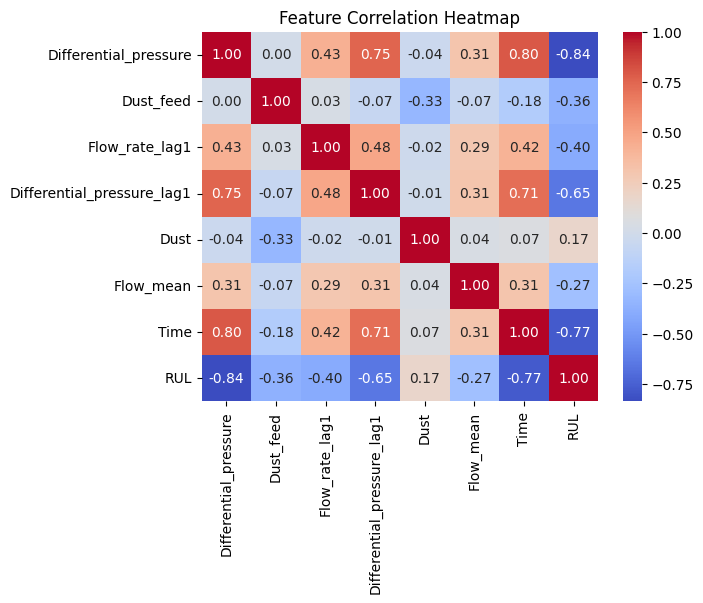

In [ ]:
corr = refined_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

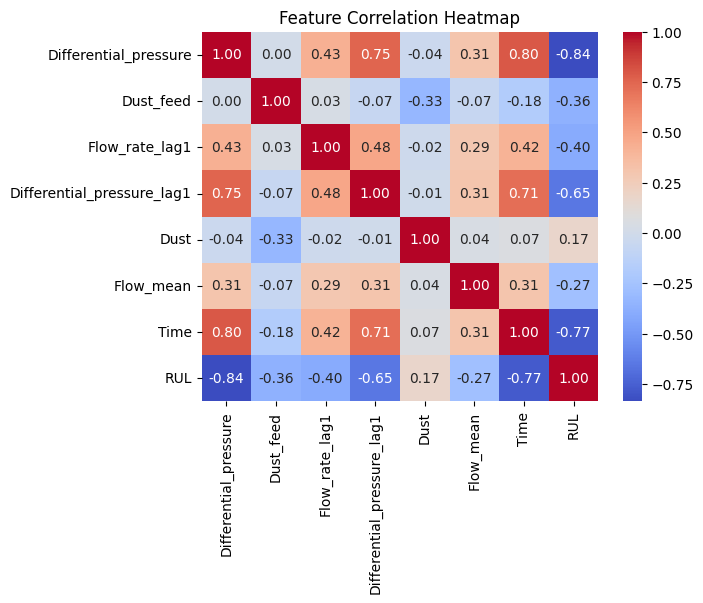

In [ ]:
corr = refined_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#Modelling

#Using XGBOOST

In [ ]:
# # Separate features (X) and differenced target (y_diff)
X = refined_data.drop(columns=['RUL'])
y_diff = refined_data['RUL']
# Train-test split
X_train, X_test, y_train_diff, y_test_diff = train_test_split(X, y_diff, test_size=0.2, random_state=42)



# Save the last value of the training target for reverse differencing
last_observed_value = df["RUL"].iloc[-1]


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Train XGBoost on differenced target
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
# model = xgb.XGBRegressor(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=5,
#     objective='reg:squarederror'
# )

model.fit(X_train, y_train_diff)


# Predict on the test set
y_pred_diff = model.predict(X_test)

# Evaluate differenced RMSE
rmse_diff = np.sqrt(mean_squared_error(y_test_diff, y_pred_diff))
print(f"Differenced RMSE: {rmse_diff}")

r2 = r2_score(y_test_diff, y_pred_diff)
print(f"R-squared (R²): {r2}")


Differenced RMSE: 0.09745082300302636
R-squared (R²): 0.6669684656337798


In [ ]:
a =[[0.090423,	0.0	,0.0	,0.090423	,0.0	,0.000000, 1]]
model.predict(a)

array([-0.00551882], dtype=float32)

In [ ]:
y_test.reset_index(drop=True, inplace=True)

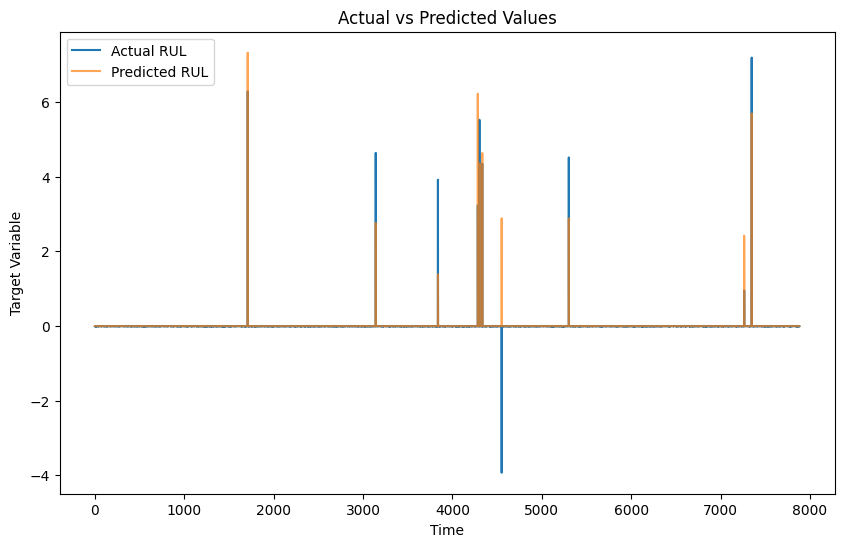

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test_diff, label='Actual RUL')
plt.plot(y_test.index, y_pred_diff, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
# Use .loc to align based on the DatetimeIndex
y_test = df["RUL"].loc[y_test_diff.index]

# Reverse differencing
y_pred = y_pred_diff.cumsum() + last_observed_value

# Ensure y_pred and y_test are aligned
y_pred = pd.Series(y_pred, index=y_test.index)

# Evaluate RMSE on the original scale
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Original Scale RMSE: {rmse}")


Original Scale RMSE: 6.224942267977607


#lightBGM

In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
)

model.fit(X_train, y_train_diff)


# Predict on the test set
y_pred_diff = model.predict(X_test)

# Evaluate differenced RMSE
rmse_diff = np.sqrt(mean_squared_error(y_test_diff, y_pred_diff))
print(f"rmse: {rmse_diff}")

r2 = r2_score(y_test_diff, y_pred_diff)
print(f"R-squared (R²): {r2}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 31531, number of used features: 5
[LightGBM] [Info] Start training from score 0.000118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
!pip install --upgrade scikit-learn xgboost


#Using VAR

In [ ]:
from statsmodels.tsa.api import VAR
lag_order= 7
forecast_steps = 10
# Fit the VAR model
model = VAR(refined_data)
model_fitted = model.fit(lag_order)  # `lag_order` is the number of lags you want to use

# Make predictions
forecast = model_fitted.forecast(refined_data.values[-lag_order:], steps=forecast_steps)


#Using Random Forest Regressor

In [ ]:
X = df_train.drop(columns=['RUL'])
y = df_train['RUL']

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.2 , random_state = 42)


In [ ]:
X_train.head(1)

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust
7241,13,2.441406,57.503764,7.1,79.246266,1


In [ ]:
X_test.head(1)

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Dust
1992,5,54.70559,57.953698,17.4,316.985065,1


In [ ]:
y_test.head(1)

,RUL
1992,31.8


In [ ]:
# Initializing scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()


In [ ]:
# Using Standard Scaler on features and target
X_train_scaled = feature_scaler.fit_transform(X_train)
y_train_scaled = target_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
model.score(X_train_scaled, y_train_scaled)

0.9999826878163272

In [ ]:
# Scale the original features for prediction
X_scaled = feature_scaler.transform(X)



In [ ]:
X_scaled

array([[-1.8534519 , -0.77367043, -1.83990042, -1.08970455,  1.37541206,
        -0.32639437],
       [-1.8534519 , -0.77291803, -1.60216076, -1.08808966,  1.37541206,
        -0.32639437],
       [-1.8534519 , -0.77592762, -1.5636507 , -1.08647477,  1.37541206,
        -0.32639437],
       ...,
       [ 2.01591576,  3.10191772,  0.8376186 , -0.24834601,  2.37763919,
         1.12824037],
       [ 2.01591576,  3.15383342,  0.84133419, -0.24673112,  2.37763919,
         1.12824037],
       [ 2.01591576,  3.16963396,  0.86140015, -0.24511623,  2.37763919,
         1.12824037]])

In [ ]:
X_test_scaled = feature_scaler.transform(X_test)

In [ ]:
# Predict RUL
y_scaled_prediction = model.predict(X_scaled)

In [ ]:
y_scaled_prediction

array([-0.71100808, -0.709942  , -0.64396656, ..., -1.39713105,
       -1.39931719, -1.39995144])

In [ ]:
X_test_scaled

array([[-1.53758515, -0.32072839, -1.34136075, -0.8103283 ,  2.37763919,
        -0.32639437],
       [ 0.43658202, -0.77592762,  0.6926998 , -0.88622821, -0.83070985,
         1.12824037],
       [-0.43205154, -0.31546169,  0.77816525, -0.14176317, -0.83070985,
        -1.7810291 ],
       ...,
       [-1.53758515, -0.70745964, -1.29891794, -1.07194074,  2.37763919,
        -0.32639437],
       [-0.82688497,  0.11265112, -1.2834849 ,  0.39276596, -0.58015307,
        -0.32639437],
       [-0.19515147, -0.46669312, -1.23545063, -0.59231793,  0.40577768,
        -0.32639437]])

In [ ]:
y_test_scaled_prediction = model.predict(X_test_scaled)

In [ ]:
y_test_scaled_prediction

array([-1.07591744,  2.40806886,  0.43120773, ..., -0.86137918,
       -0.11102158, -0.83586076])

In [ ]:
# Inverse transform the predictions to the original scale
y_original_prediction = target_scaler.inverse_transform(y_scaled_prediction.reshape(-1, 1))

In [ ]:
y_original_prediction.shape

(39414, 1)

In [ ]:
y_test_prediction = target_scaler.inverse_transform(y_test_scaled_prediction.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
r2 = r2_score(y_test, y_test_prediction)
mse = mean_squared_error(y_test, y_test_prediction)
mae = mean_absolute_error(y_test, y_test_prediction)

print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

R^2 Score: 0.9999
Mean Squared Error: 0.5005
Mean Absolute Error: 0.2206


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.99981412 0.99979153 0.99987413 0.9998247  0.99978712]
Mean CV R² Score: 0.9998183210826168


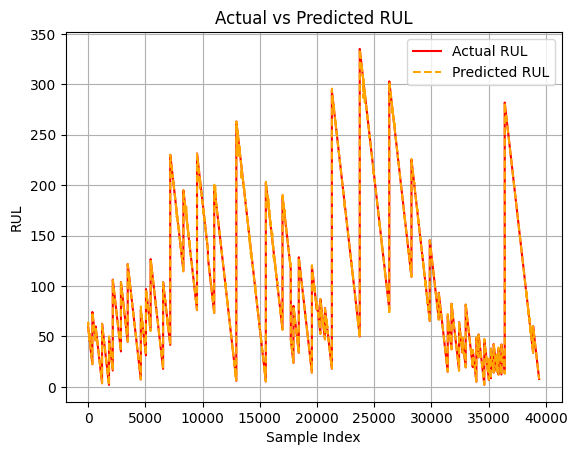

In [ ]:
plt.plot(df_train["RUL"], label="Actual RUL", color='red')

# Ploting predicted RUL
plt.plot(y_original_prediction, label="Predicted RUL", color='orange', linestyle='dashed')

plt.xlabel("Sample Index")
plt.ylabel("RUL")
plt.title("Actual vs Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pickle

# Saving the trained model
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Saving the feature scaler
with open("feature_scaler.pkl", "wb") as feature_scaler_file:
    pickle.dump(feature_scaler, feature_scaler_file)

# Saving the target scaler
with open("target_scaler.pkl", "wb") as target_scaler_file:
    pickle.dump(target_scaler, target_scaler_file)


